In [1]:
%matplotlib inline
import numpy as np
np.random.seed(555)
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import statsmodels as sm
from statsmodels.graphics import tsaplots
from statsmodels.tsa import stattools
from statsmodels.tsa.api import VAR, DynamicVAR

In [3]:
# statsmodelsにdefaultで入っているマクロ経済学データを取得
df_data = sm.datasets.macrodata.load_pandas().data

# realgdp:実質GDP, realcons:実質個人消費支出, realinv:実質設備投資
# 1959Q1-2009Q3
df_data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [4]:
# indexを年月日に変換しておく
df_data.index = pd.date_range('1959', periods=51*4-1, freq='Q')
# 必要なカラムのみを取得
y = df_data[['realgdp','realcons','realinv']]

In [5]:
ctt_realgdp = stattools.adfuller(y.realgdp, regression="ctt")
ctt_realcons = stattools.adfuller(y.realcons, regression="ctt")
ctt_realinv = stattools.adfuller(y.realinv, regression="ctt")

ct_realgdp = stattools.adfuller(y.realgdp, regression="ct")
c_realgdp = stattools.adfuller(y.realgdp, regression="c") 
nc_realgdp = stattools.adfuller(y.realgdp, regression="nc") 

ct_realcons = stattools.adfuller(y.realcons, regression="ct")
c_realcons = stattools.adfuller(y.realcons, regression="c") 
nc_realcons = stattools.adfuller(y.realcons, regression="nc")

ct_realinv = stattools.adfuller(y.realinv, regression="ct")
c_realinv = stattools.adfuller(y.realinv, regression="c") 
nc_realinv = stattools.adfuller(y.realinv, regression="nc") 

# print("nc realgdp:")
# print(nc_realgdp) 
# print("nc realcons:") 
# print(nc_realcons) 
# print("nc realinv:") 
# print(nc_realinv)

# print("c realgdp:")
# print(c_realgdp) 
# print("c realcons:") 
# print(c_realcons) 
# print("c realinv:") 
# print(c_realinv)

# print("ct realgdp:")
# print(ct_realgdp) 
# print("ct realcons:") 
# print(ct_realcons) 
# print("ct realinv:") 
# print(ct_realinv)

print("ctt realgdp:")
print(ctt_realgdp) 
print("ctt realcons:") 
print(ctt_realcons) 
print("ctt realinv:") 
print(ctt_realinv)

ctt realgdp:
(-2.23162556344085, 0.7145024076165568, 12, 190, {'1%': -4.433161444379647, '5%': -3.8638358600379066, '10%': -3.572676939641347}, 2030.9096153927815)
ctt realcons:
(-3.0087027982374495, 0.2910505147103011, 3, 199, {'1%': -4.430309046694293, '5%': -3.8623972900169137, '10%': -3.5717916732395594}, 1787.2221616792606)
ctt realinv:
(-1.6319215466161374, 0.9226177810403522, 3, 199, {'1%': -4.430309046694293, '5%': -3.8623972900169137, '10%': -3.5717916732395594}, 1945.7305980020012)


## 2階のdiffを取った場合

In [6]:
# 2次の階差
y_diff = y.diff().diff().dropna()

In [7]:
y_diff.head()

,realgdp,realcons,realinv
1959-09-30,-71.765,-8.2,-45.594
1959-12-31,13.029,-16.2,31.763
1960-03-31,52.779,14.9,22.236
1960-06-30,-75.804,5.6,-65.936
1960-09-30,17.941,-29.5,31.793


In [8]:
ctt_realgdp_diff = stattools.adfuller(y_diff.realgdp, regression="ctt")
ctt_realcons_diff = stattools.adfuller(y_diff.realcons, regression="ctt")
ctt_realinv_diff = stattools.adfuller(y_diff.realinv, regression="ctt")
print("ctt realgdp_diff:")
print(ctt_realgdp_diff)
print("ctt realcons_diff:")
print(ctt_realcons_diff)
print("ctt realinv_diff:")
print(ctt_realinv_diff)

ctt realgdp_diff:
(-5.730711170853159, 4.5129005984904305e-05, 14, 186, {'1%': -4.434519413562635, '5%': -3.864520481428023, '10%': -3.5730981406825575}, 2025.6464949041335)
ctt realcons_diff:
(-16.93087519175753, 7.342618607969787e-25, 1, 199, {'1%': -4.430309046694293, '5%': -3.8623972900169137, '10%': -3.5717916732395594}, 1792.6484152650387)
ctt realinv_diff:
(-8.24609938470208, 8.390408624174994e-11, 7, 193, {'1%': -4.432180562792867, '5%': -3.8633412462204713, '10%': -3.5723725968816216}, 1936.5507934933225)


In [9]:
# モデルの作成
model_diff = VAR(y_diff)

# 最適なハイパーパラメタ（ラグの次数）の探索
model_diff.select_order(10).summary()

,AIC,BIC,FPE,HQIC
0,22.00,22.05,3.570e+09,22.02
1,21.20,21.40,1.607e+09,21.28
2,20.73,21.09*,1.007e+09,20.87
3,20.61,21.12,8.953e+08,20.82*
4,20.58,21.25,8.701e+08,20.85
5,20.55,21.37,8.406e+08,20.88
6,20.59,21.56,8.748e+08,20.98
7,20.61,21.74,8.983e+08,21.07
8,20.50,21.77,8.009e+08,21.01
9,20.49*,21.92,7.995e+08*,21.07


In [10]:
# AIC基準で最適なハイパーパラメタを選択したモデルのあてはめ
result_diff = model_diff.fit(maxlags=10, ic='aic')
# あてはめの結果を表示
result_diff.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 25, Jul, 2019
Time:                     13:40:04
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    21.9079
Nobs:                     192.000    HQIC:                   21.0600
Log likelihood:          -2699.66    FPE:                7.91212e+08
AIC:                      20.4828    Det(Omega_mle):     5.25930e+08
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.352231         3.570180            0.099           0.921
L1.realgdp         -1.247885         0.162953           -7.658           0.000
L1.realcons         1.084603         0.212161            5.112    

In [11]:
result_diff.k_ar

9

In [12]:
fevd_diff = result_diff.fevd(4)
fevd_diff.summary()

FEVD for realgdp
      realgdp  realcons   realinv
0    1.000000  0.000000  0.000000
1    0.892571  0.096255  0.011175
2    0.887540  0.097189  0.015271
3    0.883109  0.095237  0.021655

FEVD for realcons
      realgdp  realcons   realinv
0    0.266466  0.733534  0.000000
1    0.283437  0.697520  0.019043
2    0.282337  0.698602  0.019061
3    0.281744  0.698428  0.019828

FEVD for realinv
      realgdp  realcons   realinv
0    0.479571  0.204551  0.315877
1    0.289142  0.461684  0.249174
2    0.292990  0.459687  0.247323
3    0.305582  0.449273  0.245145




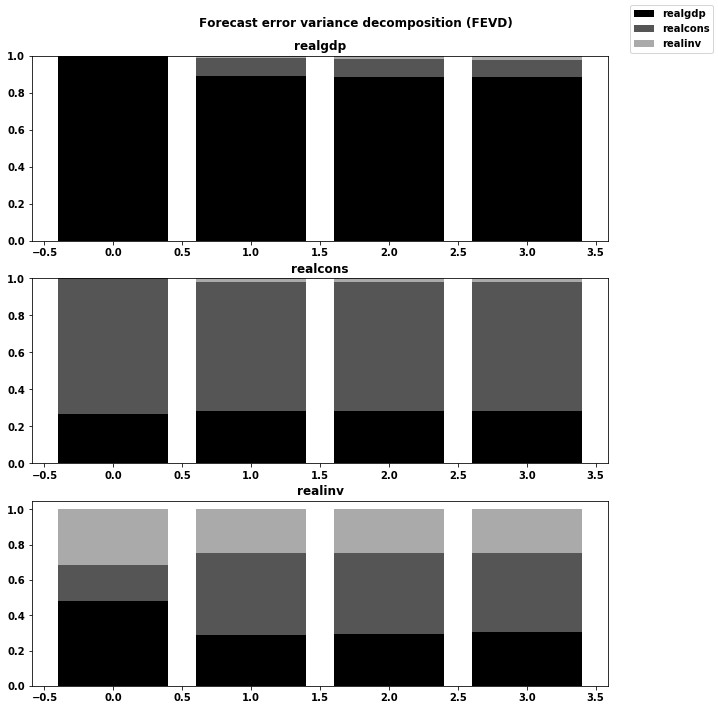

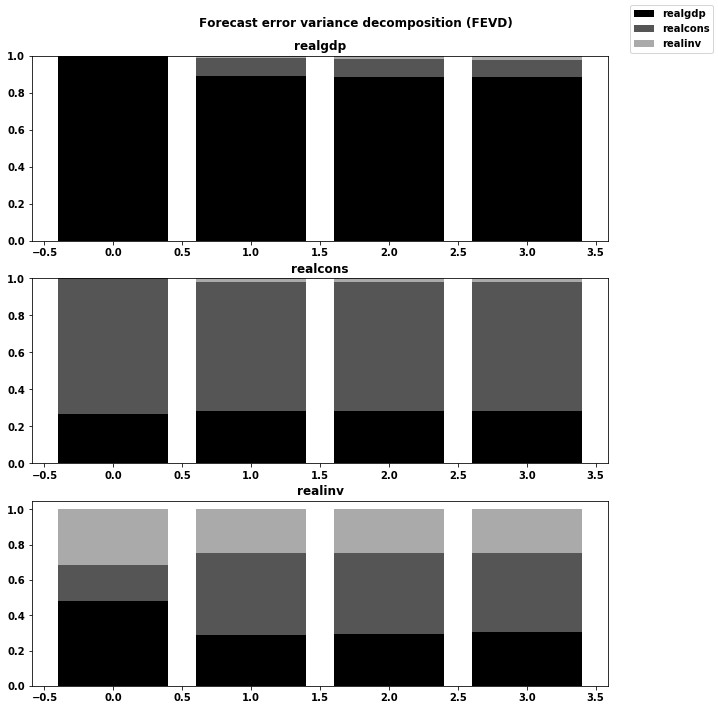

In [13]:
# 予測誤差に対する各変数の起因割合
result_diff.fevd(4).plot()

# グレンジャー因果検定

In [14]:
from copy import deepcopy

var_names = ['realgdp', 'realinv', 'realcons']
# 各変数とその他の変数群の因果
for i in range(len(var_names)):
    vs = deepcopy(var_names)
    print(result_diff.test_causality(vs.pop(i), vs, kind='f').summary())

Granger causality F-test. H_0: %s do not Granger-cause realgdp. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    3.964          1.625       0.000  (18, 492)
-----------------------------------------------
Granger causality F-test. H_0: %s do not Granger-cause realinv. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    6.364          1.625       0.000  (18, 492)
-----------------------------------------------
Granger causality F-test. H_0: %s do not Granger-cause realcons. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
    2.395          1.625       0.001  (18, 492)
-----------------------------------------------


In [15]:
var_names = ['realgdp', 'realinv', 'realcons']
# 各変数とその他の変数（単体）の因果
for i in range(len(var_names)):
    vs = deepcopy(var_names)
    tv = vs.pop(i)
    for v in vs:
        print(result_diff.test_causality(tv, v, kind='f').summary())

Granger causality F-test. H_0: realinv does not Granger-cause realgdp. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
    1.026          1.899       0.418  (9, 492)
----------------------------------------------
Granger causality F-test. H_0: realcons does not Granger-cause realgdp. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
    6.306          1.899       0.000  (9, 492)
----------------------------------------------
Granger causality F-test. H_0: realgdp does not Granger-cause realinv. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
    1.024          1.899       0.419  (9, 492)
----------------------------------------------
Granger causality F-test. H_0: realcons does not Granger-ca